# seaborn: statistical data visualization

- Seaborn is a Python data visualization library based on matplotlib. 
- It provides a high-level interface for drawing attractive and informative statistical graphics. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns



## Palmer Penguins

This dataset contains 344 penguins, of 3 different species, observed in three islands of the Palmer archipelago, in Antarctica.It has:
- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex



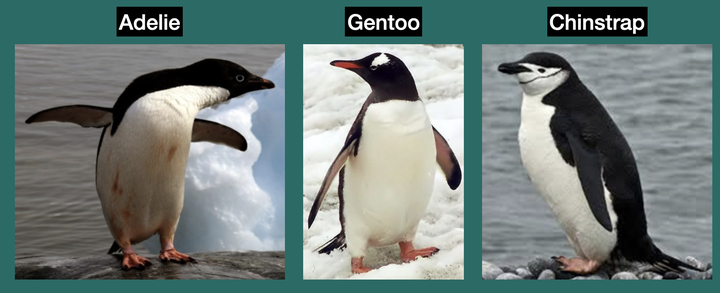

In [2]:
pinguins = pd.read_csv('https://raw.githubusercontent.com/ftorresd/OCEAN-datasets/main/penguins/penguins.csv')

In [3]:
pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
pinguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
pinguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Style**

In [6]:
# REF: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("whitegrid") 

#### **Count Plot and Bar Plot**

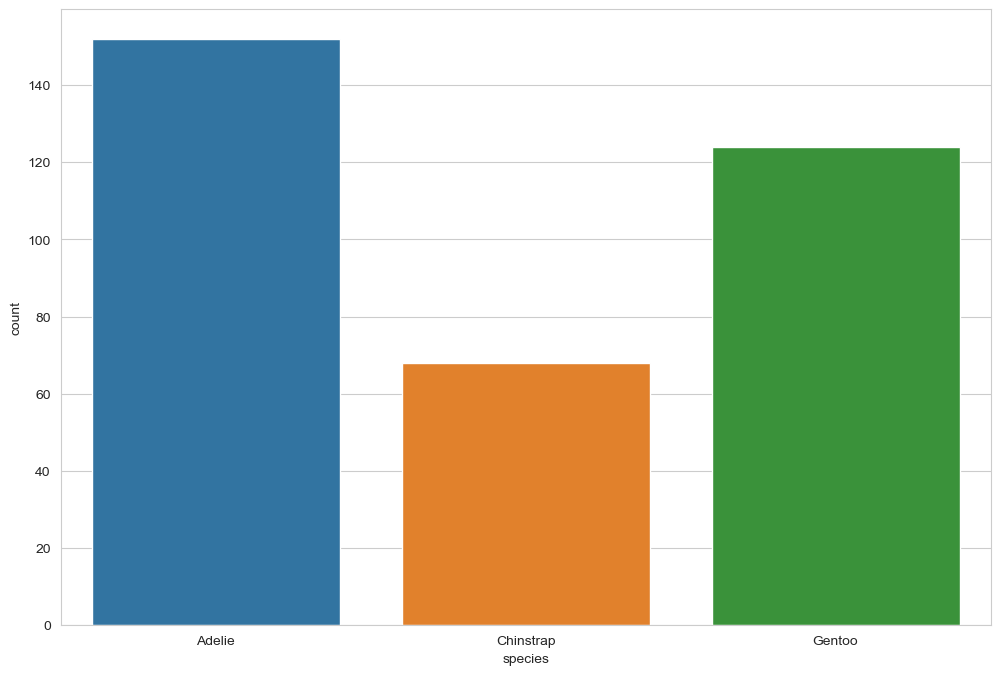

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(x="species", data=pinguins);


In [8]:
buffer = pinguins.groupby(['island'])['body_mass_g'].sum()
buffer = buffer.reset_index()
buffer

,island,body_mass_g
0,Biscoe,787575.0
1,Dream,460400.0
2,Torgersen,189025.0


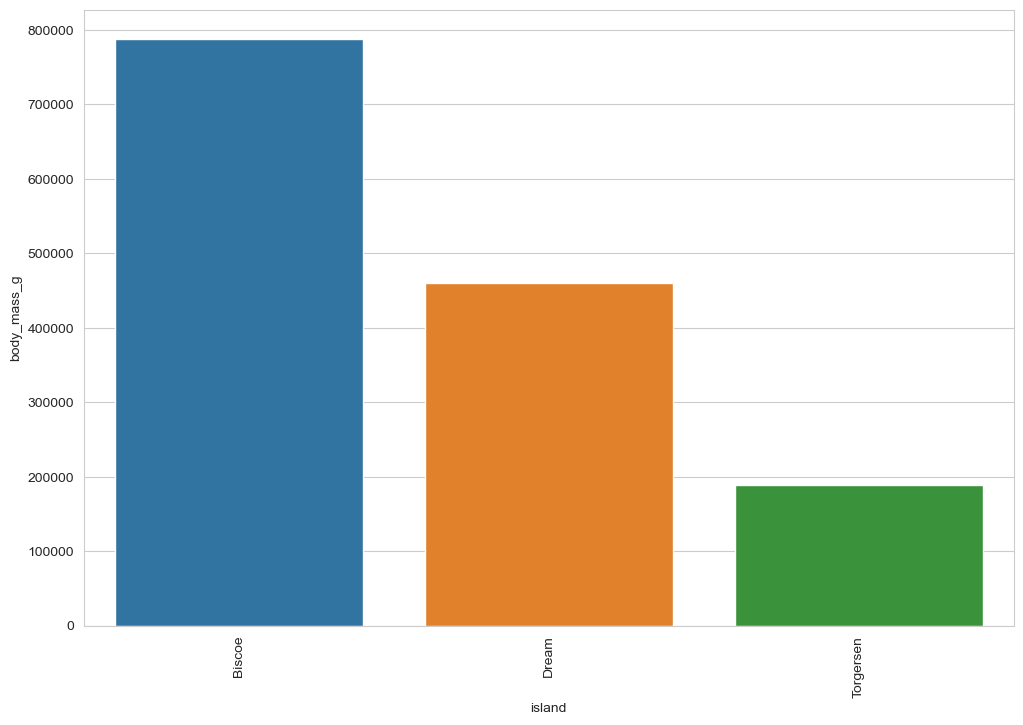

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x="island", y="body_mass_g", data=buffer)
plt.xticks(rotation=90);

#### **Collor Palettes**

Documentation: http://seaborn.pydata.org/tutorial/color_palettes.html

In [10]:
sns.color_palette("light:b")

[(0.9427942677547513, 0.942825384792593, 0.9519953287278279),
 (0.754235414203801, 0.7542603078340744, 0.9615962629822623),
 (0.5656765606528508, 0.5656952308755558, 0.9711971972366967),
 (0.3771177071019005, 0.3771301539170372, 0.9807981314911312),
 (0.18855885355095026, 0.18856507695851854, 0.9903990657455656),
 (0.0, 0.0, 1.0)]

In [11]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

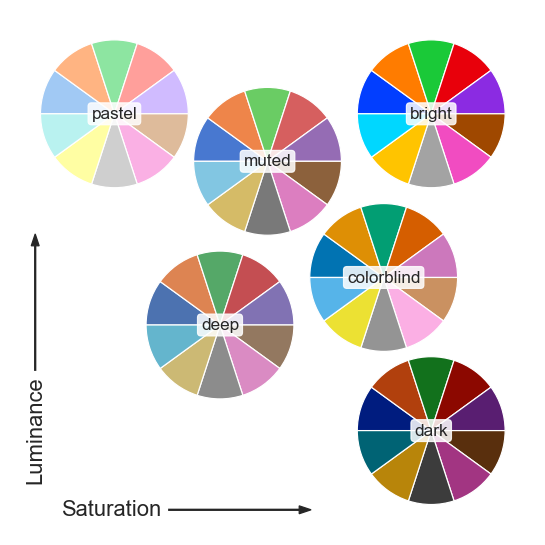

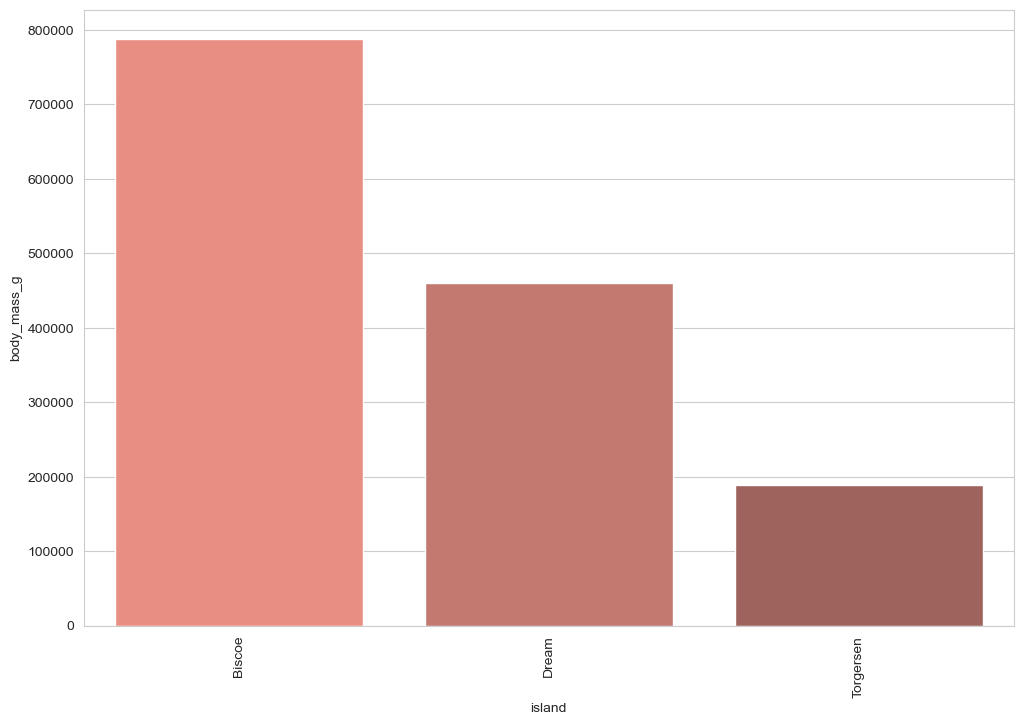

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x="island", y="body_mass_g", data=buffer, palette=sns.color_palette("dark:salmon_r"))
plt.xticks(rotation=90);

#### **Relationships**

<Figure size 1200x800 with 0 Axes>

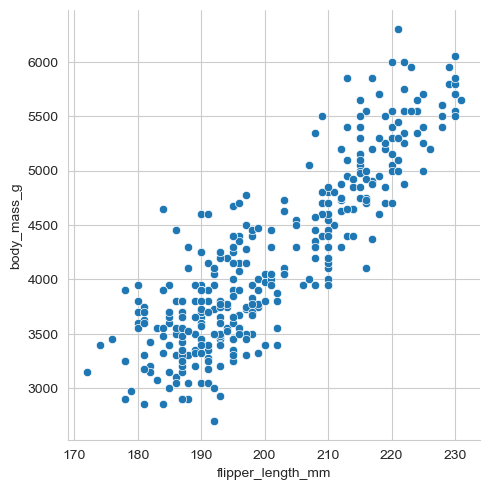

In [14]:
plt.figure(figsize=(12, 8))
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins);

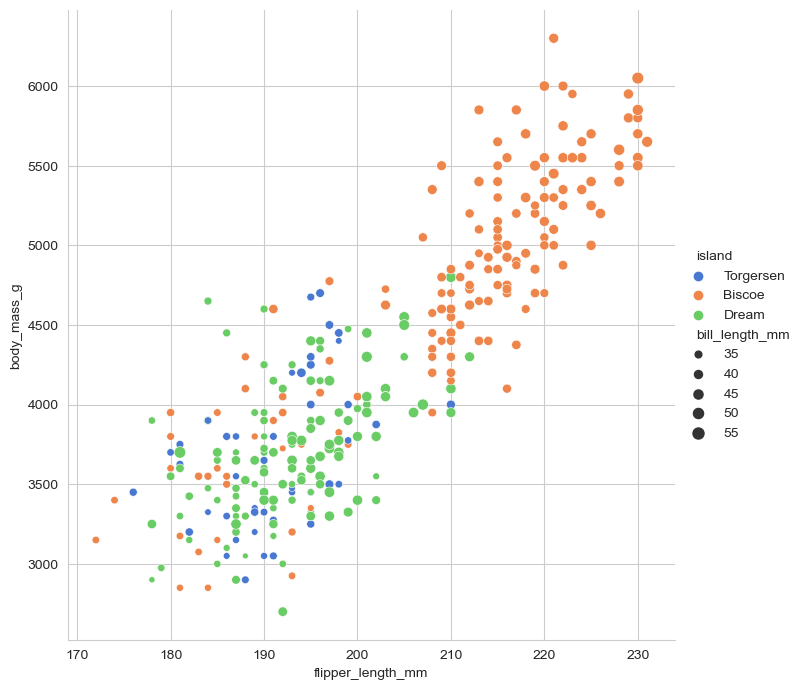

In [15]:
sns.relplot(x="flipper_length_mm", y="body_mass_g", data=pinguins, hue="island", size="bill_length_mm", palette='muted', height=7);

####  **Joint Plot**

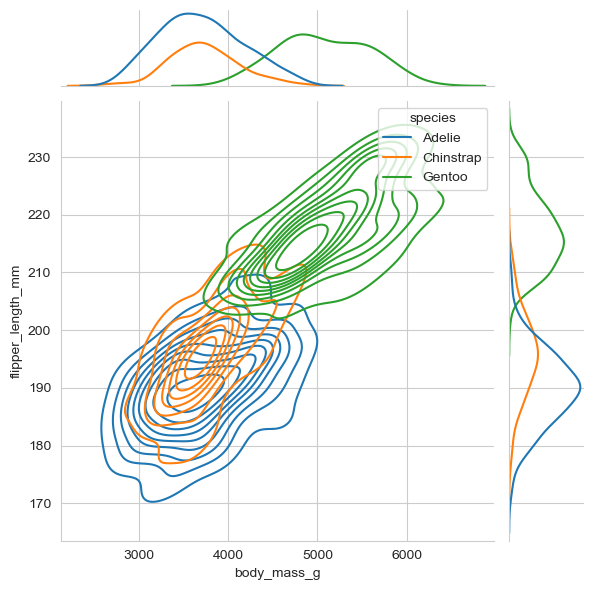

In [17]:
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
g = sns.jointplot(data=pinguins, x="body_mass_g", y="flipper_length_mm", hue="species", kind='kde');
g.savefig('test.png', dpi=300)

#### **Pair Plot**

<Figure size 1200x800 with 0 Axes>

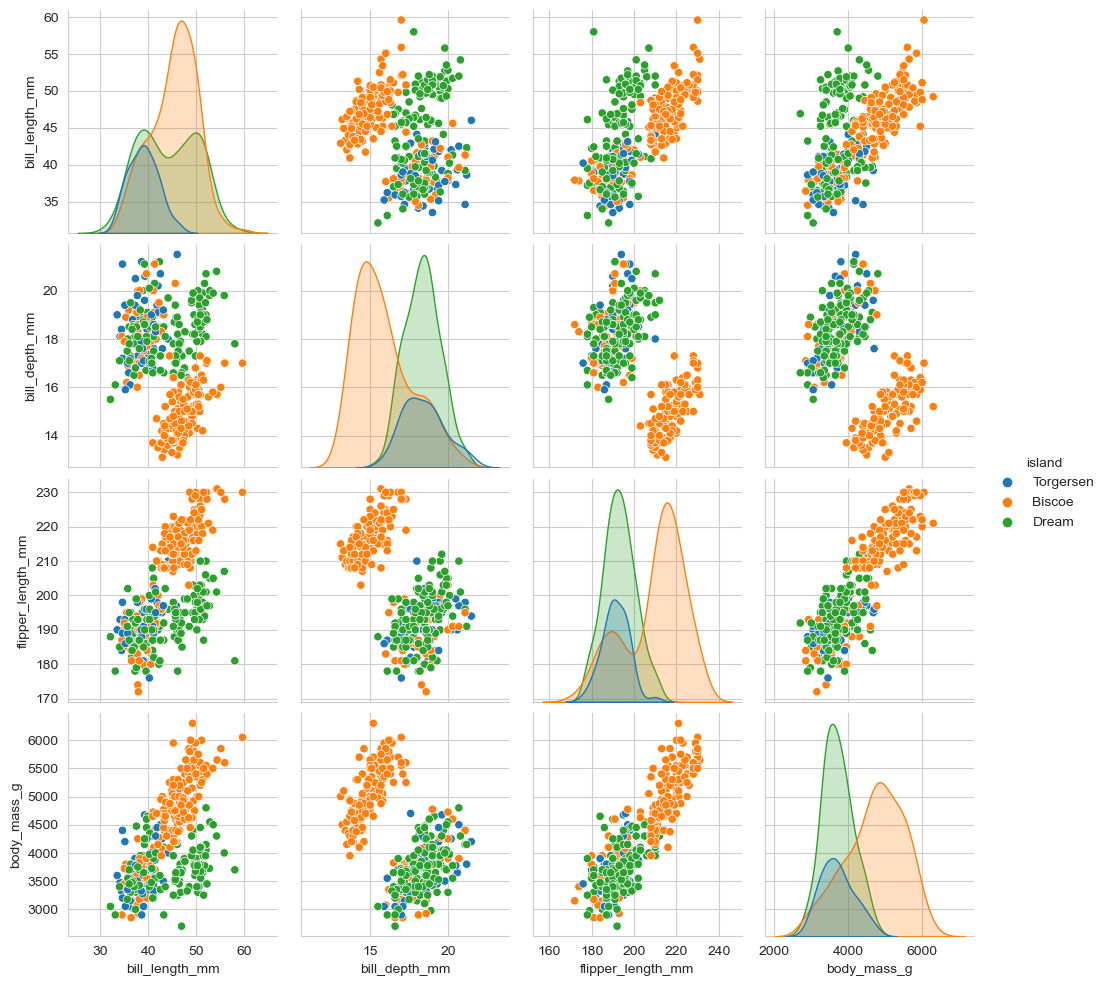

In [18]:
plt.figure(figsize=(12, 8))
sns.pairplot(pinguins, hue="island");

#### **Heatmap**

Data preparation

In [19]:
buffer = pinguins.pivot_table(index='species', columns='island', values='flipper_length_mm', aggfunc='mean')
buffer

island,Biscoe,Dream,Torgersen
species,,,
Adelie,188.795455,189.732143,191.196078
Chinstrap,NaN,195.823529,NaN
Gentoo,217.186992,NaN,NaN


In a heatmap, the same variable will be evaluated for different combinations of categories

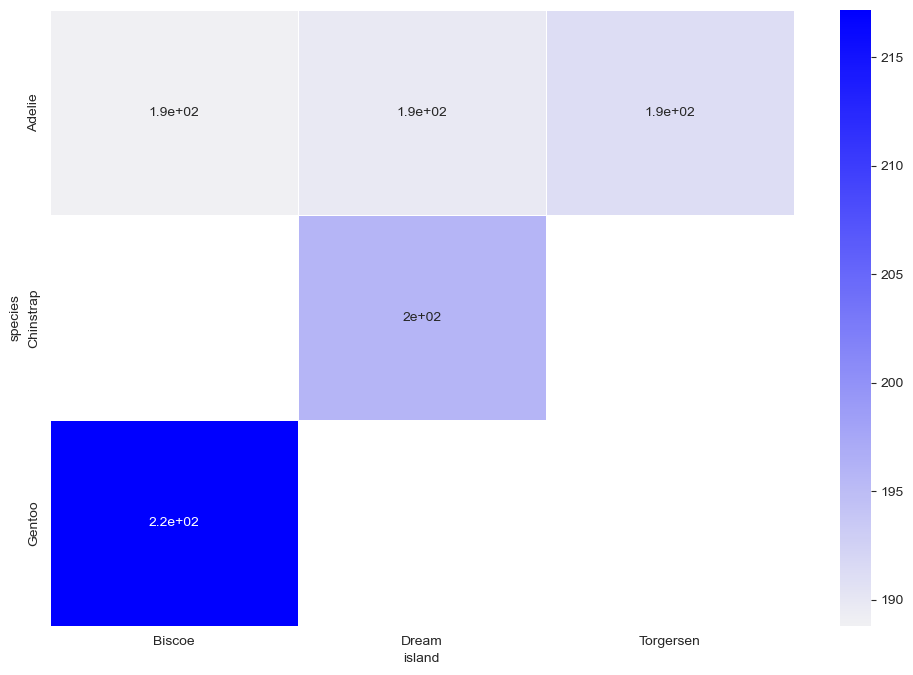

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=buffer, annot=True, linewidths=.5, cmap=sns.color_palette('light:b', as_cmap=True) );

#### **KDE Plot (estimated density)**

In a density graph, the closer the lines are, the denser the region, that is, the more entries (line in the dataset) there are

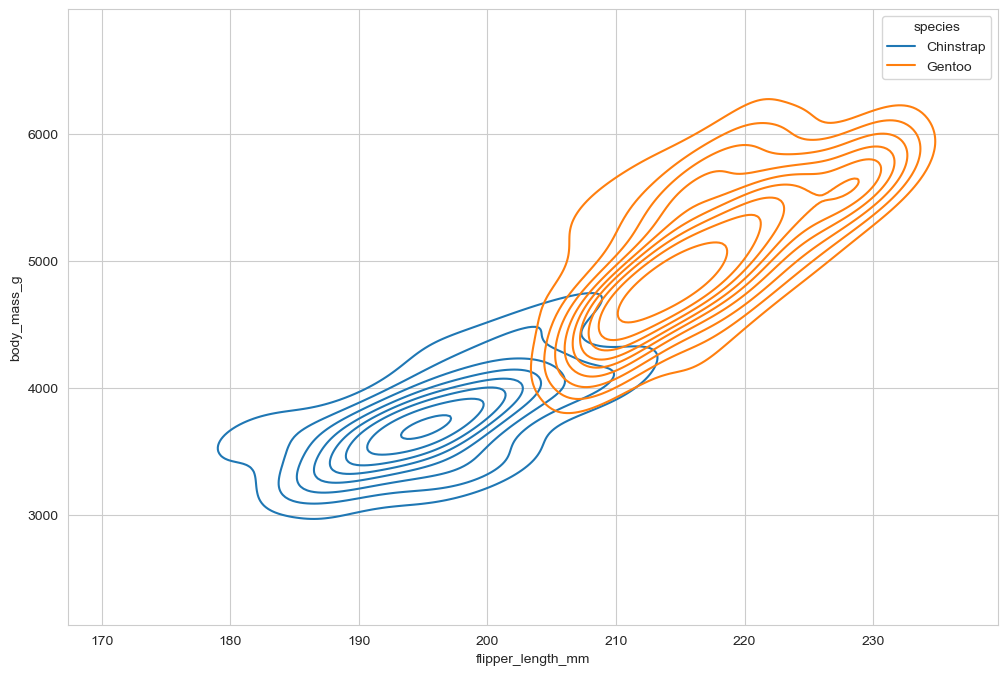

In [21]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=pinguins[pinguins['species'] != 'Adelie'],
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    thresh=.1);

#### **Box Plot**

In descriptive statistics, box plot, diagram of extremes and quartiles, box plot is a graphical tool to represent the variation of observed data of a numerical variable by means of quartiles.

The box plot has a line (whisker or whisker wire) extending vertically or horizontally from the box, indicating variability outside the upper quartile and the lower quartile.

Outliers or outliers (outliers) can be plotted as individual points.


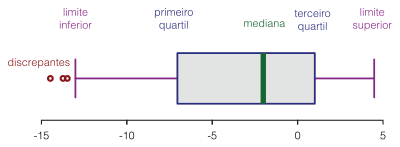

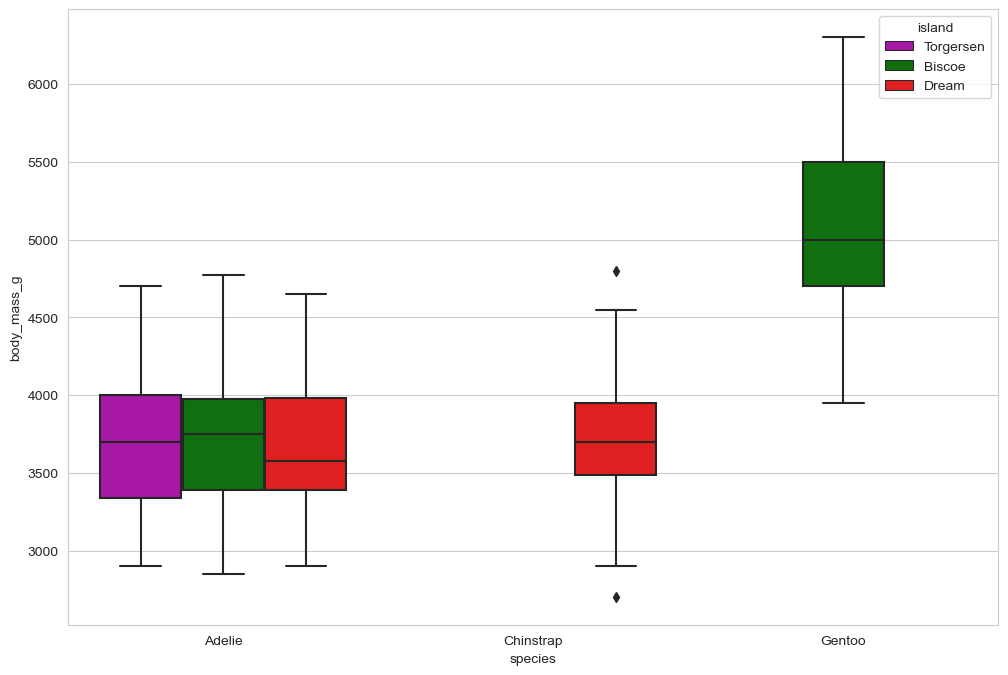

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

# sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="species", y="body_mass_g",
            hue="island", palette=["m", "g", "r"],
            data=pinguins);

# sns.despine(offset=10, trim=True);

# import matplotlib.ticker as plticker
# ax.yaxis.set_major_locator(plticker.MultipleLocator(base=100))

In [23]:
(pinguins[pinguins['species'] == 'Gentoo']).describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000
